In [ ]:
def Random_Forest_Model(data):

    # Define features and target
    X=data.iloc[:,:-1].values
    y=data.iloc[:,-1].values

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create a random forest classifier
    rfc = RandomForestClassifier()

    # Fit the classifier to the training data
    rfc.fit(X_train, y_train)

    # Visualize
    visualize = 5
    estimator = rfc.estimators_[visualize]

    # Plot the tree
    plt.figure(figsize=(100,40))
    plot_tree(estimator, filled=True)
    plt.show()


    # Prediction
    y_pred = rfc.predict(X_test)

    # Accuracy on the train data
    accuracy = rfc.score(X_train, y_train)
    percentage =  accuracy * 100
    print( f"Accuracy on the train data : {percentage} % ")


    # Accuracy on the test data
    accuracy = rfc.score(X_test, y_test)
    percentage =  accuracy * 100
    print( f"Accuracy on the test data : {percentage} % ")

    # Confusion Matrix
    CM = confusion_matrix(y_test,y_pred)
    print( f"Confusion Matrix : \n{CM}")

    # Classification Report
    CR = classification_report(y_test,y_pred)
    print( f"Accuracy on the train data : \n{CR}")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/My Drive/code_ques.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.355365,2.348287,1.030452,-1.503548,-0.380958,1.095197,-2.063201,-1.657276,0.780015,0.224140,...,-2.330601,0.542652,-1.660974,-2.150713,0.545611,-1.614411,-0.133085,-2.134145,1.184289,10.0
1,-1.403411,2.131454,1.117223,-1.542901,-0.351417,1.042730,-2.025140,-1.812830,0.707280,0.165037,...,-2.183963,0.488854,-1.674375,-2.027182,0.514854,-1.625416,0.014533,-2.156347,1.088794,8.0
2,-1.388594,2.358305,0.994477,-1.480365,-0.382565,1.104627,-2.042682,-1.669257,0.800453,0.265268,...,-2.347989,0.555944,-1.651969,-2.149015,0.582454,-1.606852,-0.164269,-2.139201,1.158317,7.0
3,-1.352139,2.155489,1.027737,-1.424550,-0.316464,1.111701,-2.039937,-1.789147,0.725883,0.298638,...,-2.216481,0.487809,-1.595799,-2.143987,0.419316,-1.635483,-0.074271,-2.112344,1.094625,5.0
4,-1.411875,2.337363,1.050743,-1.506995,-0.321872,1.118751,-2.068671,-1.603735,0.730069,0.242844,...,-2.279187,0.451709,-1.607142,-2.184134,0.521283,-1.604708,-0.055002,-2.056900,1.290956,6.0


In [ ]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    print(col)
    print(df[col].isnull().sum())

score
4


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Final_score'] = np.where(df['score'] > 5, 1, 0)

In [ ]:
X=df.iloc[:,:]
X=X.drop(['score','Final_score'],axis=1)
print(X.shape)
y=df['Final_score']
print(y.shape)

(1172, 768)
(1172,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
def Decision_Tree_Model(X, y):


    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create a decision tree classifier

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    # Visualize the constructed tree with plot_tree() command
    # Calculate training set accuracy
    train_accuracy = model.score(X_train, y_train)
    print(f"Training Set Accuracy: {train_accuracy}")
    test_accuracy = model.score(X_test, y_test)
    print(f"Test Set Accuracy: {test_accuracy}")

# Get the depth of the tree
    tree_depth = model.get_depth()
    print(f"Tree Depth: {tree_depth}")
    # Assuming 'model' is your trained DecisionTreeClassifier
    plt.figure(figsize=(15, 10))  # Set the figure size (adjust as needed)
    tree.plot_tree(model, filled=True, feature_names=X.columns)  # Adjust feature names if necessary
    plt.show()
    y_train_pred = model.predict(X_train)
    y_train_true = y_train
    y_test_pred = model.predict(X_test)
    y_test_true = y_test
    confusion_matrix_train = confusion_matrix(y_train_true, y_train_pred)
    classification_report_train = classification_report(y_train_true, y_train_pred)

# Confusion Matrix and Classification Report for Test Data
    confusion_matrix_test = confusion_matrix(y_test_true, y_test_pred)
    classification_report_test = classification_report(y_test_true, y_test_pred)

    print("Confusion Matrix for Training Data:")
    print(confusion_matrix_train)
    print("\nClassification Report for Training Data:")
    print(classification_report_train)

    print("\nConfusion Matrix for Test Data:")
    print(confusion_matrix_test)
    print("\nClassification Report for Test Data:")
    print(classification_report_test)

    train_f1_score = f1_score(y_train_true,y_train_pred)
    print("Training F1-Score:", train_f1_score)

    test_f1_score = f1_score(y_test_true,y_test_pred)
    print("Testing F1-Score:", test_f1_score)

    threshold = 0.02

    if abs(train_f1_score - test_f1_score) < threshold:

      outcome = "Regular Fit"

    elif train_f1_score > test_f1_score:

      outcome = "Overfitting"

    else:

      outcome = "Underfitting"



# Print the learning outcome

    print("Model Learning Outcome:", outcome)




Training Set Accuracy: 0.9893276414087513
Test Set Accuracy: 0.7276595744680852
Tree Depth: 21


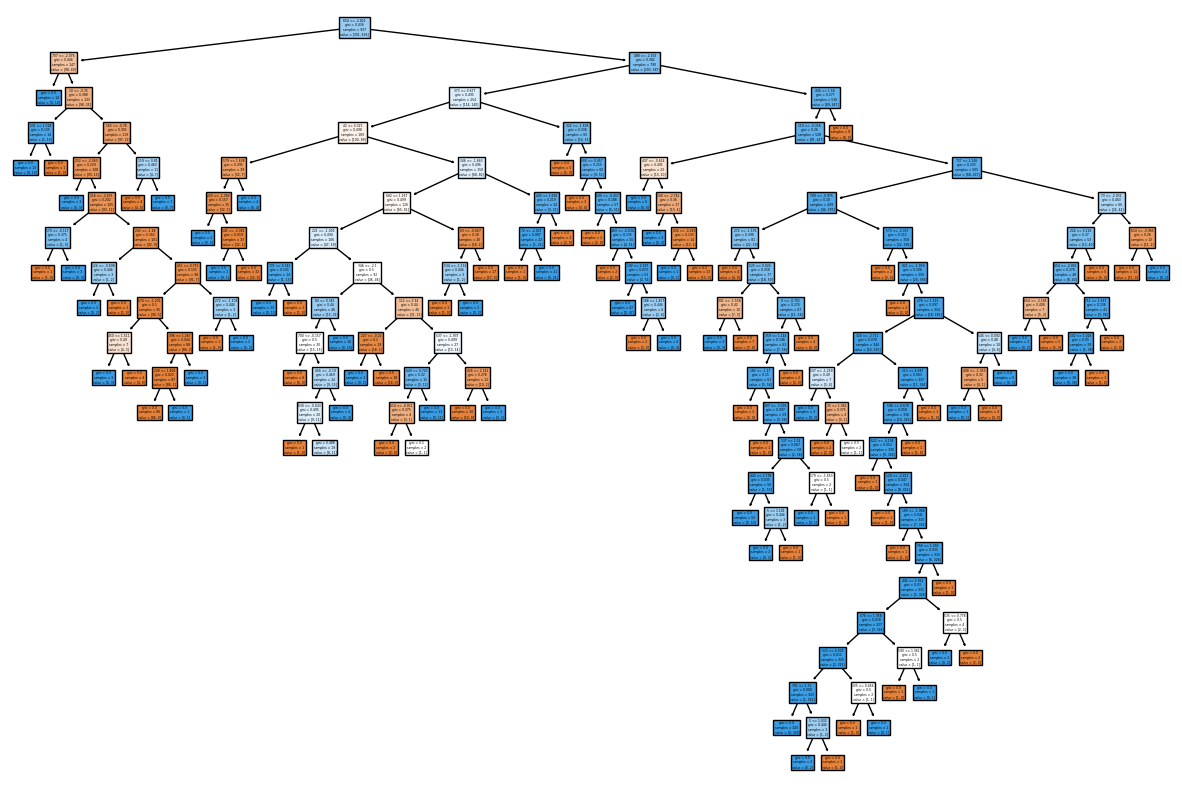

Confusion Matrix for Training Data:
[[293   8]
 [  2 634]]

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       301
           1       0.99      1.00      0.99       636

    accuracy                           0.99       937
   macro avg       0.99      0.99      0.99       937
weighted avg       0.99      0.99      0.99       937


Confusion Matrix for Test Data:
[[ 52  32]
 [ 32 119]]

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        84
           1       0.79      0.79      0.79       151

    accuracy                           0.73       235
   macro avg       0.70      0.70      0.70       235
weighted avg       0.73      0.73      0.73       235

Training F1-Score: 0.9921752738654147
Testing F1-Score: 0.7880794701986755
Model Learning Outcome: Overfitting


In [ ]:
Decision_Tree_Model(X, y)

In [ ]:

def Decision_Tree_Model_depth(X, y):


    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create a decision tree classifier

    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X_train, y_train)
    # Visualize the constructed tree with plot_tree() command
    # Calculate training set accuracy
    train_accuracy = model.score(X_train, y_train)
    print(f"Training Set Accuracy: {train_accuracy}")
    test_accuracy = model.score(X_test, y_test)
    print(f"Test Set Accuracy: {test_accuracy}")

# Get the depth of the tree
    tree_depth = model.get_depth()
    print(f"Tree Depth: {tree_depth}")
    # Assuming 'model' is your trained DecisionTreeClassifier
    plt.figure(figsize=(15, 10))  # Set the figure size (adjust as needed)
    tree.plot_tree(model, filled=True, feature_names=X.columns)  # Adjust feature names if necessary
    plt.show()
    y_train_pred = model.predict(X_train)
    y_train_true = y_train
    y_test_pred = model.predict(X_test)
    y_test_true = y_test
    confusion_matrix_train = confusion_matrix(y_train_true, y_train_pred)
    classification_report_train = classification_report(y_train_true, y_train_pred)

# Confusion Matrix and Classification Report for Test Data
    confusion_matrix_test = confusion_matrix(y_test_true, y_test_pred)
    classification_report_test = classification_report(y_test_true, y_test_pred)

    print("Confusion Matrix for Training Data:")
    print(confusion_matrix_train)
    print("\nClassification Report for Training Data:")
    print(classification_report_train)

    print("\nConfusion Matrix for Test Data:")
    print(confusion_matrix_test)
    print("\nClassification Report for Test Data:")
    print(classification_report_test)

    train_f1_score = f1_score(y_train_true,y_train_pred)
    print("Training F1-Score:", train_f1_score)

    test_f1_score = f1_score(y_test_true,y_test_pred)
    print("Testing F1-Score:", test_f1_score)

    threshold = 0.1

    if abs(train_f1_score - test_f1_score) < threshold:

      outcome = "Regular Fit"

    elif train_f1_score > test_f1_score:

      outcome = "Overfitting"

    else:

      outcome = "Underfitting"



# Print the learning outcome

    print("Model Learning Outcome:", outcome)




Training Set Accuracy: 0.8537886872998933
Test Set Accuracy: 0.7063829787234043
Tree Depth: 5


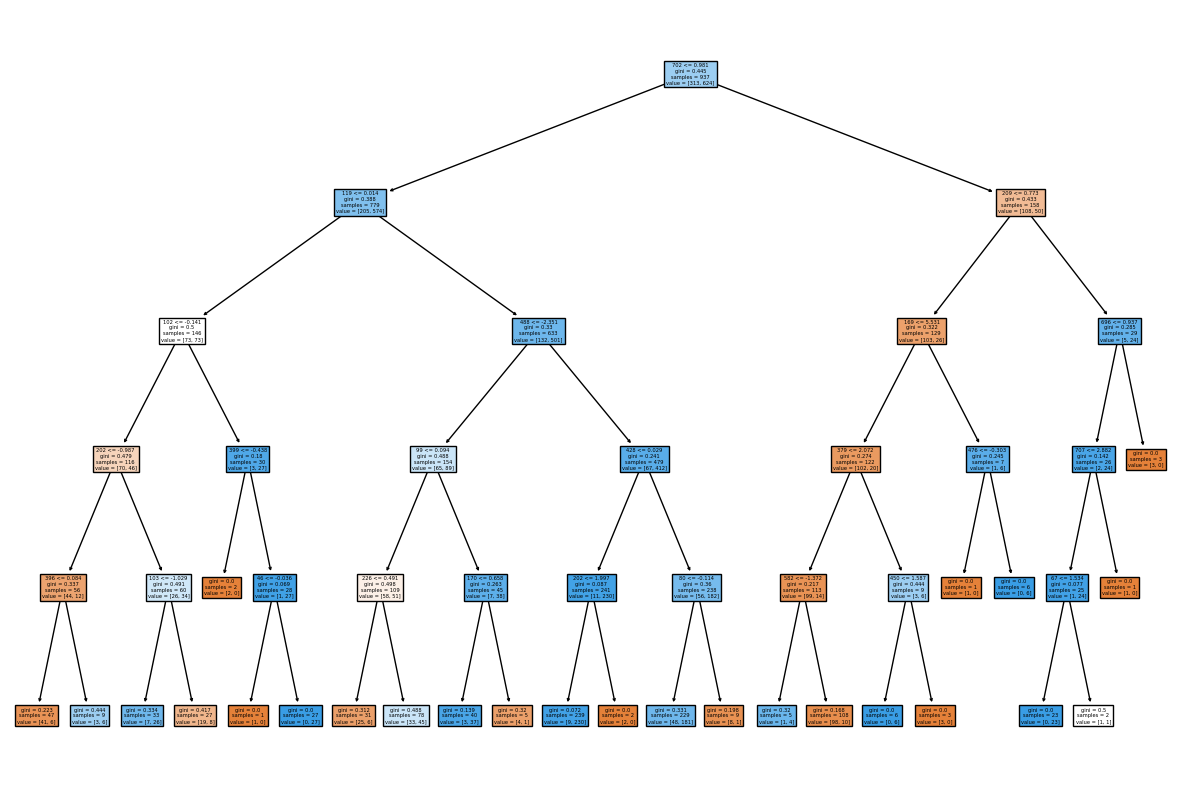

Confusion Matrix for Training Data:
[[209 104]
 [ 33 591]]

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75       313
           1       0.85      0.95      0.90       624

    accuracy                           0.85       937
   macro avg       0.86      0.81      0.82       937
weighted avg       0.85      0.85      0.85       937


Confusion Matrix for Test Data:
[[ 31  41]
 [ 28 135]]

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.53      0.43      0.47        72
           1       0.77      0.83      0.80       163

    accuracy                           0.71       235
   macro avg       0.65      0.63      0.63       235
weighted avg       0.69      0.71      0.70       235

Training F1-Score: 0.8961334344200151
Testing F1-Score: 0.7964601769911503
Model Learning Outcome: Regular Fit


In [ ]:
Decision_Tree_Model_depth(X, y)

In [ ]:


def Decision_Tree_Model_entropy(X, y):


    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create a decision tree classifier

    model = DecisionTreeClassifier(criterion="entropy")
    model.fit(X_train, y_train)
    # Visualize the constructed tree with plot_tree() command
    # Calculate training set accuracy
    train_accuracy = model.score(X_train, y_train)
    print(f"Training Set Accuracy: {train_accuracy}")
    test_accuracy = model.score(X_test, y_test)
    print(f"Test Set Accuracy: {test_accuracy}")

# Get the depth of the tree
    tree_depth = model.get_depth()
    print(f"Tree Depth: {tree_depth}")
    # Assuming 'model' is your trained DecisionTreeClassifier
    plt.figure(figsize=(15, 10))  # Set the figure size (adjust as needed)
    tree.plot_tree(model, filled=True, feature_names=X.columns)  # Adjust feature names if necessary
    plt.show()
    y_train_pred = model.predict(X_train)
    y_train_true = y_train
    y_test_pred = model.predict(X_test)
    y_test_true = y_test
    confusion_matrix_train = confusion_matrix(y_train_true, y_train_pred)
    classification_report_train = classification_report(y_train_true, y_train_pred)

# Confusion Matrix and Classification Report for Test Data
    confusion_matrix_test = confusion_matrix(y_test_true, y_test_pred)
    classification_report_test = classification_report(y_test_true, y_test_pred)

    print("Confusion Matrix for Training Data:")
    print(confusion_matrix_train)
    print("\nClassification Report for Training Data:")
    print(classification_report_train)

    print("\nConfusion Matrix for Test Data:")
    print(confusion_matrix_test)
    print("\nClassification Report for Test Data:")
    print(classification_report_test)

    train_f1_score = f1_score(y_train_true,y_train_pred)
    print("Training F1-Score:", train_f1_score)

    test_f1_score = f1_score(y_test_true,y_test_pred)
    print("Testing F1-Score:", test_f1_score)

    threshold = 0.1

    if abs(train_f1_score - test_f1_score) < threshold:

      outcome = "Regular Fit"

    elif train_f1_score > test_f1_score:

      outcome = "Overfitting"

    else:

      outcome = "Underfitting"



# Print the learning outcome

    print("Model Learning Outcome:", outcome)




Training Set Accuracy: 0.9893276414087513
Test Set Accuracy: 0.6212765957446809
Tree Depth: 16


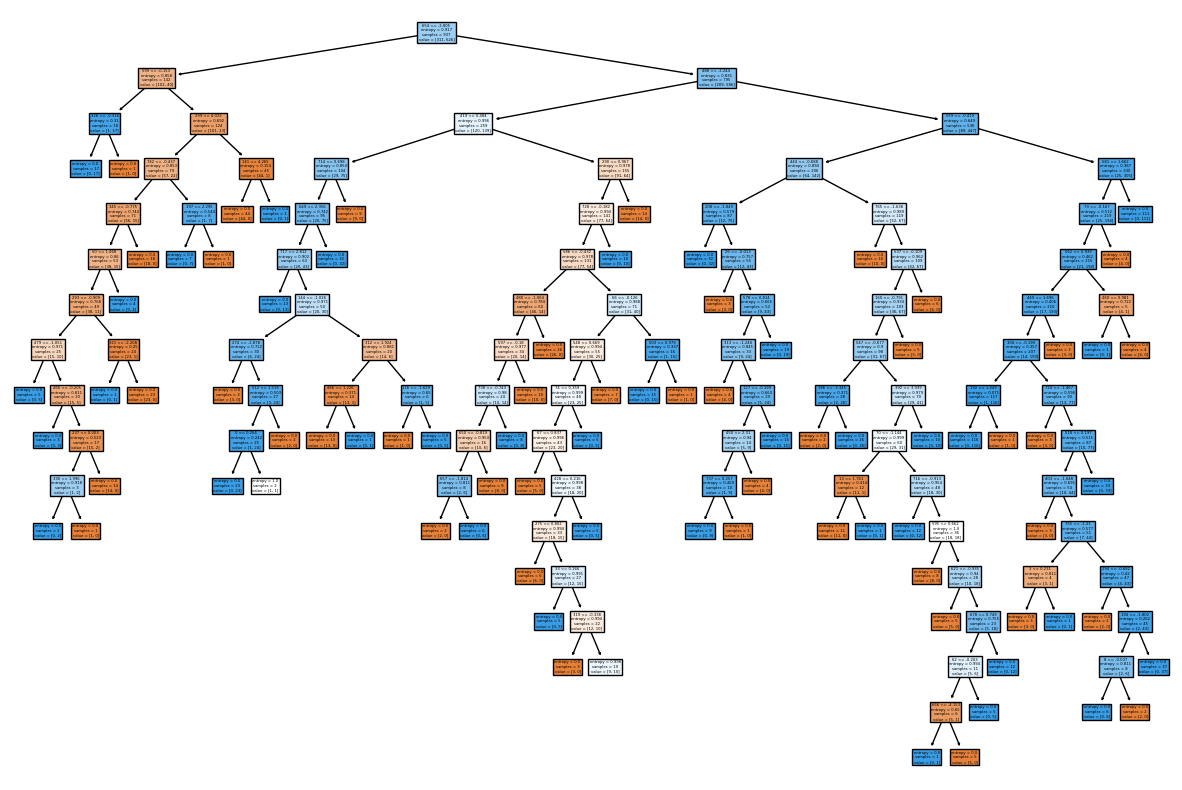

Confusion Matrix for Training Data:
[[302   9]
 [  1 625]]

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       311
           1       0.99      1.00      0.99       626

    accuracy                           0.99       937
   macro avg       0.99      0.98      0.99       937
weighted avg       0.99      0.99      0.99       937


Confusion Matrix for Test Data:
[[ 37  37]
 [ 52 109]]

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.42      0.50      0.45        74
           1       0.75      0.68      0.71       161

    accuracy                           0.62       235
   macro avg       0.58      0.59      0.58       235
weighted avg       0.64      0.62      0.63       235

Training F1-Score: 0.9920634920634921
Testing F1-Score: 0.7100977198697068
Model Learning Outcome: Overfitting


In [ ]:
Decision_Tree_Model_entropy(X, y)

In [ ]:


from sklearn.ensemble import RandomForestClassifier

def Random_forest_model(X, y):


    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create a decision tree classifier

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    # Visualize the constructed tree with plot_tree() command
    # Calculate training set accuracy
    train_accuracy = model.score(X_train, y_train)
    print(f"Training Set Accuracy: {train_accuracy}")
    test_accuracy = model.score(X_test, y_test)
    print(f"Test Set Accuracy: {test_accuracy}")

# Get the depth of the tree

    y_train_pred = model.predict(X_train)
    y_train_true = y_train
    y_test_pred = model.predict(X_test)
    y_test_true = y_test
    confusion_matrix_train = confusion_matrix(y_train_true, y_train_pred)
    classification_report_train = classification_report(y_train_true, y_train_pred)

# Confusion Matrix and Classification Report for Test Data
    confusion_matrix_test = confusion_matrix(y_test_true, y_test_pred)
    classification_report_test = classification_report(y_test_true, y_test_pred)

    print("Confusion Matrix for Training Data:")
    print(confusion_matrix_train)
    print("\nClassification Report for Training Data:")
    print(classification_report_train)

    print("\nConfusion Matrix for Test Data:")
    print(confusion_matrix_test)
    print("\nClassification Report for Test Data:")
    print(classification_report_test)

    train_f1_score = f1_score(y_train_true,y_train_pred)
    print("Training F1-Score:", train_f1_score)

    test_f1_score = f1_score(y_test_true,y_test_pred)
    print("Testing F1-Score:", test_f1_score)

    threshold = 0.1

    if abs(train_f1_score - test_f1_score) < threshold:

      outcome = "Regular Fit"

    elif train_f1_score > test_f1_score:

      outcome = "Overfitting"

    else:

      outcome = "Underfitting"



# Print the learning outcome

    print("Model Learning Outcome:", outcome)




In [ ]:
Random_forest_model(X, y)

Training Set Accuracy: 0.9882604055496265
Test Set Accuracy: 0.7148936170212766
Confusion Matrix for Training Data:
[[309   3]
 [  8 617]]

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       312
           1       1.00      0.99      0.99       625

    accuracy                           0.99       937
   macro avg       0.98      0.99      0.99       937
weighted avg       0.99      0.99      0.99       937


Confusion Matrix for Test Data:
[[ 36  37]
 [ 30 132]]

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.55      0.49      0.52        73
           1       0.78      0.81      0.80       162

    accuracy                           0.71       235
   macro avg       0.66      0.65      0.66       235
weighted avg       0.71      0.71      0.71       235

Training F1-Score: 0.9911646586345381
Testing F1-Score: 0.7975830815709

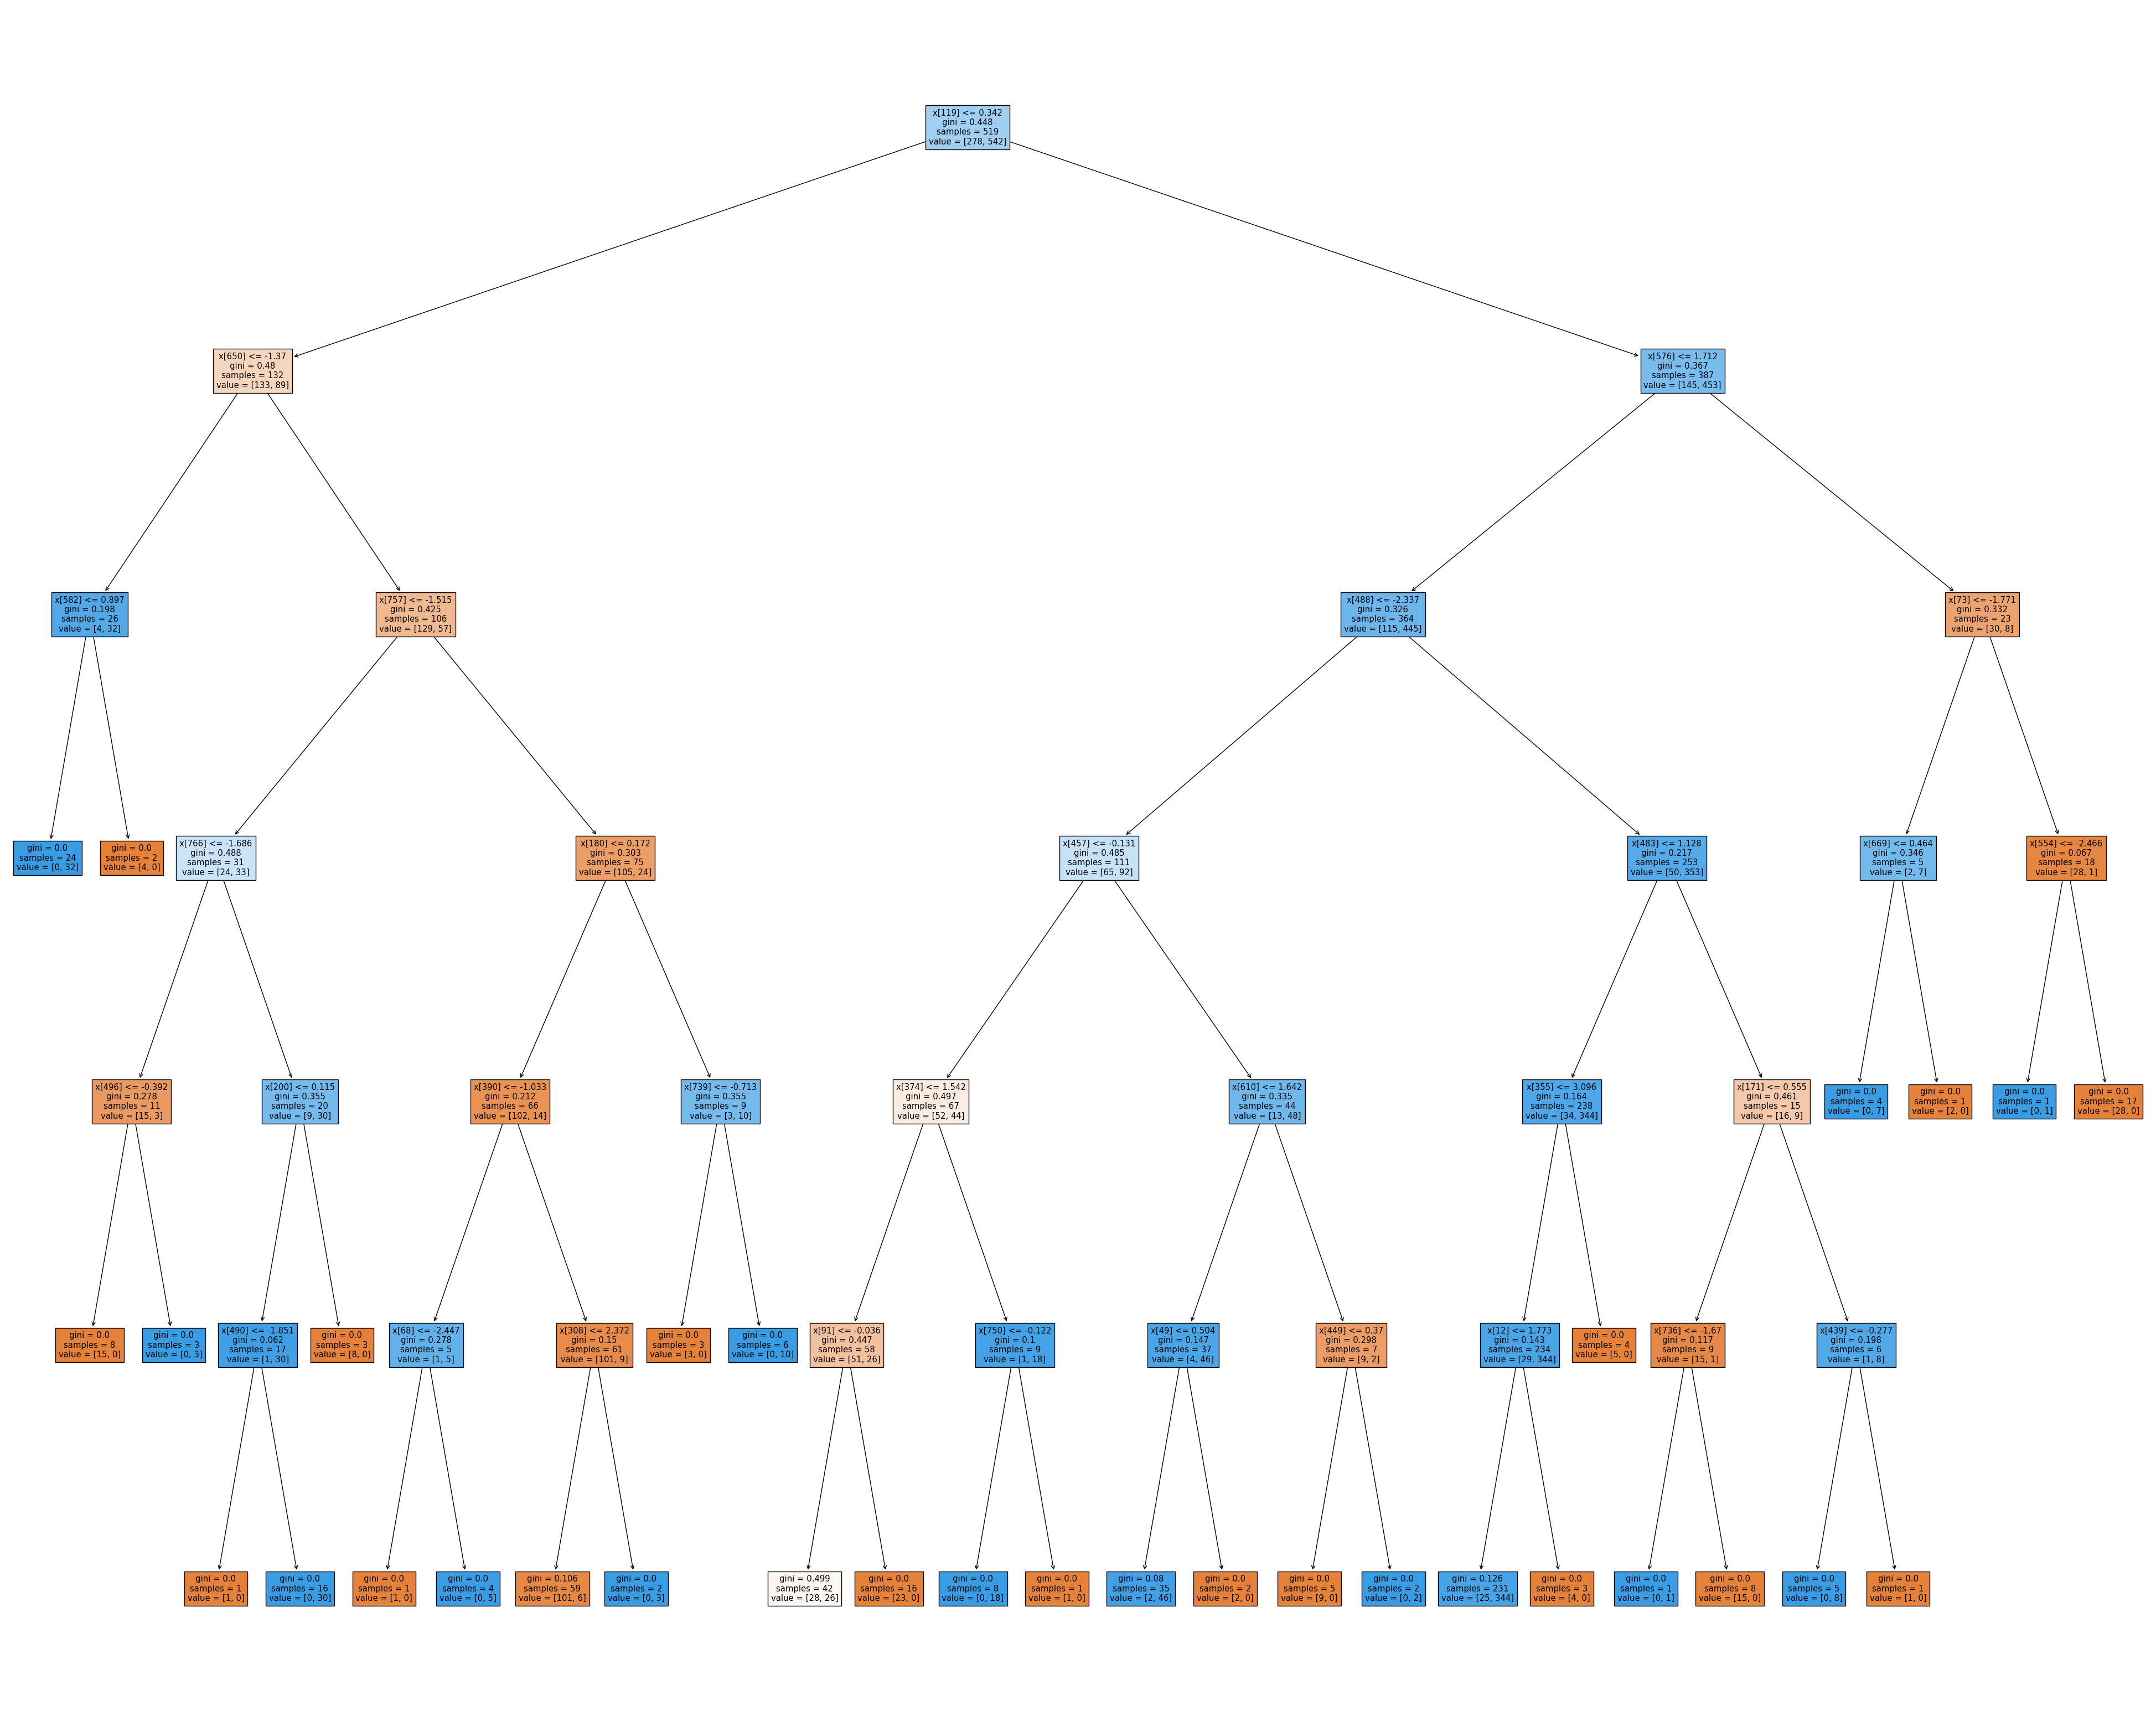

Accuracy on the train data : 91.21951219512195 % 
Accuracy on the test data : 73.57954545454545 % 


In [37]:

# Create a random forest classifier
rfc = RandomForestClassifier(
n_estimators=100,       # Number of decision trees in the forest
max_depth=6,            # Maximum depth of individual trees
min_samples_split=2,    # Minimum number of samples required to split an internal node
min_samples_leaf=1,     # Minimum number of samples required to be at a leaf node
max_features=0.5,       # max_features = 0.5 means it considers a random 50% of the total features at each split.
random_state=42         # Seed for random number generator for reproducibility
)

# Fit the classifier to the training data
rfc.fit(X_train, y_train)


# Prediction
y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

# Visualize
visualize = 5
estimator = rfc.estimators_[visualize]

# Plot the tree
plt.figure(figsize=(50,40))
plot_tree(estimator, filled=True)
plt.show()

# Accuracy on the train data
accuracy = rfc.score(X_train, y_train)
percentage =  accuracy * 100
print( f"Accuracy on the train data : {percentage} % ")


# Accuracy on the test data
accuracy = rfc.score(X_test, y_test)
percentage =  accuracy * 100
print( f"Accuracy on the test data : {percentage} % ")